# FDS IMBD Analysis

## Import Data

In [214]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import scipy.stats as stats

In [215]:
movies_path = os.path.join(os.getcwd(), 'datasets', 'IMDB-Movie-Data.csv')
movies = pd.read_csv(movies_path)
movies

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


## Data Clean

In [216]:
#Identify Missing Values
movies[movies['Revenue (Millions)'].isnull()].describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,128.000000,128.000000,128.000000,128.000000,128.00000,0.0,98.000000
mean,553.398438,2014.859375,102.195312,6.102344,25642.96875,NaN,53.938776
std,289.046882,2.521512,16.218031,1.119931,55559.24748,NaN,18.476408
min,8.000000,2006.000000,73.000000,2.700000,61.00000,NaN,16.000000
25%,331.500000,2015.000000,90.000000,5.500000,999.75000,NaN,40.250000
50%,552.000000,2016.000000,100.000000,6.150000,4741.50000,NaN,54.500000
75%,811.750000,2016.000000,109.250000,6.900000,23785.50000,NaN,67.750000
max,999.000000,2016.000000,180.000000,8.400000,358932.00000,NaN,94.000000


In [217]:
#Drop all the N/A Values
movies = movies.dropna()
movies = movies.reset_index()
movies = movies.drop(columns = ['Rank','index'])
movies.shape

(838, 11)

In [218]:
#Find all directors and their associated average revenue
unique_director = movies['Director'].unique()
director = pd.DataFrame(unique_director, columns = ['Director'])
drct_avrg_rev = []
drct_avrg_votes = []
for drct in unique_director:
    drct_avrg_rev.append(movies[movies['Director'] == drct]['Revenue (Millions)'].mean())
    drct_avrg_votes.append(movies[movies['Director'] == drct]['Votes'].mean())
director['avrg_revenue'] = drct_avrg_rev
director['avrg_votes'] = drct_avrg_votes
director

,Director,avrg_revenue,avrg_votes
0,James Gunn,113.7400,295320.000000
1,Ridley Scott,89.8825,260009.250000
2,M. Night Shyamalan,74.0980,131829.000000
3,Christophe Lourdelet,270.3200,60545.000000
4,David Ayer,150.5700,306050.333333
...,...,...,...
519,Steven Quale,42.5800,88000.000000
520,Shana Feste,23.3900,33688.000000
521,Patrick Tatopoulos,45.8000,129708.000000
522,Aamir Khan,1.2000,102697.000000


In [219]:
#Adding the director average revenue list to the movies dataframe
director_avrg_rev = [None] * len(movies)
director_avrg_votes = [None] * len(movies)
for i in range(len(movies)):
    for j in range(len(director)):
        if movies['Director'][i] == director['Director'][j]:
            director_avrg_rev[i] = director['avrg_revenue'][j]
            director_avrg_votes[i] = director['avrg_votes'][j]
movies['drct_avrg_rev'] = director_avrg_rev
movies['drct_avrg_votes'] = director_avrg_votes
movies

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,drct_avrg_rev,drct_avrg_votes
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,113.740000,295320.000000
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,89.882500,260009.250000
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,74.098000,131829.000000
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,270.320000,60545.000000
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,150.570000,306050.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0,34.820000,109576.166667
834,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0,54.720000,164088.000000
835,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0,8.253333,51018.000000
836,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0,81.850000,126470.333333


In [220]:
#Find all actors and their associated average revenue
all_actors =[]
for actors_list in movies['Actors'].apply(lambda x: tuple(x.split(','))):
    for actor in actors_list:
        all_actors.append(actor)
unique_actors = list(set(all_actors))
actors = pd.DataFrame(unique_actors, columns = ['Actor'])
act_avrg_rev = []
act_avrg_votes = []
for act in unique_actors:
    act_avrg_rev.append(movies[movies['Actors'].str.contains(act)]['Revenue (Millions)'].mean())
    act_avrg_votes.append(movies[movies['Actors'].str.contains(act)]['Votes'].mean())
actors['act_avrg_rev'] = act_avrg_rev
actors['act_avrg_votes'] = act_avrg_votes
actors

,Actor,act_avrg_rev,act_avrg_votes
0,Joshua Leonard,50.460000,92170.000000
1,Stanley Tucci,326.715000,495543.500000
2,Alice Englert,19.450000,71822.000000
3,Hugo Weaving,68.586667,293123.666667
4,Stellan Skarsgård,90.740000,220399.200000
...,...,...,...
1981,Jason Mitchell,161.030000,139831.000000
1982,Cobie Smulders,64.875000,81404.000000
1983,Sheri Moon Zombie,0.780000,10871.000000
1984,Michael Yare,3.910000,22107.000000


In [221]:
act_avrg_rev = [0] * len(movies)
act_avrg_votes = [0] * len(movies)
for i in range(len(movies)):
    for j in range(len(actors)):
        if actors['Actor'][j] in movies['Actors'][i]:
            act_avrg_rev[i] = act_avrg_rev[i] + actors['act_avrg_rev'][j]
            act_avrg_votes[i] = act_avrg_votes[i] + actors['act_avrg_votes'][j]
movies['act_avrg_rev'] = act_avrg_rev
movies['act_avrg_votes'] = act_avrg_votes
movies

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,drct_avrg_rev,drct_avrg_votes,act_avrg_rev,act_avrg_votes
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,113.740000,295320.000000,1305.656017,2.467749e+06
1,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,89.882500,260009.250000,621.039968,2.160458e+06
2,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,74.098000,131829.000000,457.681190,7.272347e+05
3,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,270.320000,60545.000000,848.778056,1.586212e+06
4,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,150.570000,306050.333333,599.861111,1.358047e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0,34.820000,109576.166667,174.080000,4.226690e+05
834,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0,54.720000,164088.000000,194.890000,6.203460e+05
835,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0,8.253333,51018.000000,70.160000,2.926080e+05
836,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0,81.850000,126470.333333,232.040000,2.827960e+05


## Model Building

#### Random Forest Model - Predicting Success (commercial Success) and Votes Number (Popularity)

In [222]:
# Random Forest Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint


# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [223]:
#Categorize movies according to their Revenue and Voting top 30% quartile
print('Top 30% quartile of Revenue:',movies['Revenue (Millions)'].quantile(0.7))
print('Top 30% quartile of Voting:',movies['Votes'].quantile(0.7))

Top 30% quartile of Revenue: 95.297
Top 30% quartile of Voting: 236184.59999999992


In [224]:
#X values for random forest model
movies_features = movies[["drct_avrg_rev", "act_avrg_rev","drct_avrg_votes", "act_avrg_votes","Runtime (Minutes)","Year"]]

#Y values: categorization for each movie according to their Revenue and Voting number
revenue_cat = [0] * len(movies)
for i in range(len(movies)):
    if movies['Revenue (Millions)'][i] > 95.297 and movies['Votes'][i] > 236184.59:
        revenue_cat[i] = 'A'
    elif  movies['Revenue (Millions)'][i] > 95.297 or movies['Votes'][i] > 236184.59:
        revenue_cat[i] = 'B'
    elif movies['Revenue (Millions)'][i] < 95.297 and movies['Votes'][i] < 236184.59:
        revenue_cat[i] = 'C'
    else:
        revenue_cat[i] = 'N/A'
        
movies_categories = pd.Series(revenue_cat, dtype="category")
#Divide the traning and test set(s stands for success)
x_s_train, x_s_test, y_s_train, y_s_test = train_test_split(movies_features, movies_categories, test_size = .30,random_state = 40)


In [225]:
movies_categories

0      A
1      A
2      B
3      B
4      A
      ..
833    C
834    C
835    C
836    C
837    C
Length: 838, dtype: category
Categories (3, object): ['A', 'B', 'C']

In [226]:
#Find a relatively 'best' set of hyperparameters using random search
param_dist = {'n_estimators': randint(1,500),
              'max_depth': randint(1,10)}

rf = RandomForestClassifier()

# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)
rand_search.fit(x_s_train, y_s_train)
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 9, 'n_estimators': 379}


In [227]:
rf = RandomForestClassifier()
rf.fit(x_s_train, y_s_train)
y_s_pred = rf.predict(x_s_test)
accuracy = accuracy_score(y_s_test, y_s_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8214285714285714


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'drct_avrg_rev'),
  Text(1, 0, 'act_avrg_rev'),
  Text(2, 0, 'act_avrg_votes'),
  Text(3, 0, 'drct_avrg_votes'),
  Text(4, 0, 'Runtime (Minutes)'),
  Text(5, 0, 'Year')])

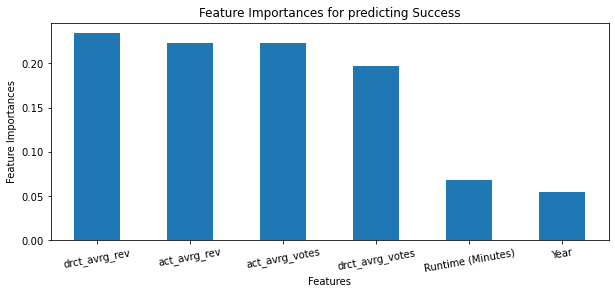

In [228]:
# Create a series containing feature importances from the model and feature names from the training data
best_rf = rand_search.best_estimator_
feature_importances = pd.Series(best_rf.feature_importances_, index=x_s_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
plt.figure(figsize=(10, 4))
feature_importances.plot.bar();
plt.xlabel('Features');
plt.ylabel('Feature Importances'); 
plt.title('Feature Importances for predicting Success')
plt.xticks(rotation = 10)

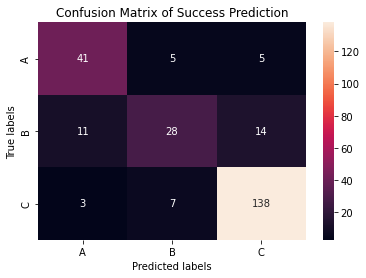

In [229]:
import seaborn as sns
import matplotlib.pyplot as plt  
# Create the confusion matrix
cm_s = confusion_matrix(y_s_test, y_s_pred, labels = ['A', 'B', 'C'])   

ax= plt.subplot()
sns.heatmap(cm_s, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix of Success Prediction'); 
ax.xaxis.set_ticklabels(['A', 'B', 'C']); ax.yaxis.set_ticklabels(['A', 'B', 'C']);

#### Random Forest Model - Predicting Rating (Metascore and Rating)

In [230]:
#Categorize movies according to their Revenue and Voting top 30% quartile
print('Top 30% quartile of Metascore:',movies['Metascore'].quantile(0.7))
print('Top 30% quartile of Rating:',movies['Rating'].quantile(0.7))

Top 30% quartile of Metascore: 69.0
Top 30% quartile of Rating: 7.3


In [231]:
#Y values: categorization for each movie according to their Revenue and Voting number
votes_cat = [0] * len(movies)
for i in range(len(movies)):
    if movies['Metascore'][i] > 69.0 and movies['Rating'][i] > 7.3:
        votes_cat[i] = 'A'
    elif  movies['Metascore'][i] > 69.0 or movies['Rating'][i] > 7.3:
        votes_cat[i] = 'B'
    elif movies['Metascore'][i] < 69.0 and movies['Rating'][i] < 7.3:
        votes_cat[i] = 'C'
    else:
        votes_cat[i] = 'N/A'
        
votes_categories = pd.Series(votes_cat, dtype="category")
#Divide the traning and test set(v stands for votes)
x_v_train, x_v_test, y_v_train, y_v_test = train_test_split(movies_features, votes_categories, test_size = .30,random_state = 40)


In [232]:
rf = RandomForestClassifier()
rf.fit(x_v_train, y_v_train)
y_v_pred = rf.predict(x_v_test)
accuracy = accuracy_score(y_v_test, y_v_pred)
print("Accuracy:", accuracy)

Accuracy: 0.623015873015873


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'drct_avrg_votes'),
  Text(1, 0, 'Runtime (Minutes)'),
  Text(2, 0, 'act_avrg_votes'),
  Text(3, 0, 'act_avrg_rev'),
  Text(4, 0, 'drct_avrg_rev'),
  Text(5, 0, 'Year')])

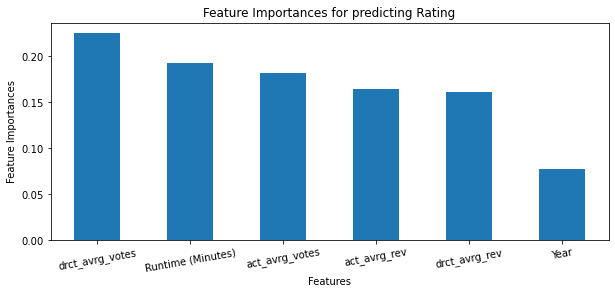

In [233]:
# Create a series containing feature importances from the model and feature names from the training data
rand_search.fit(x_v_train, y_v_train)
best_rf = rand_search.best_estimator_
feature_importances = pd.Series(best_rf.feature_importances_, index=x_v_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
plt.figure(figsize=(10, 4))
feature_importances.plot.bar();
plt.xlabel('Features');
plt.ylabel('Feature Importances'); 
plt.title('Feature Importances for predicting Rating')
plt.xticks(rotation = 10)

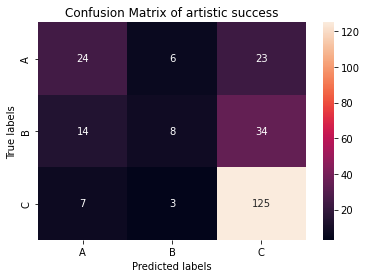

In [234]:
# Create the confusion matrix
cm_v = confusion_matrix(y_v_test, y_v_pred, labels = ['A', 'B', 'C'])   

ax= plt.subplot()
sns.heatmap(cm_v, annot=True, fmt='g', ax=ax);  

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix of artistic success'); 
ax.xaxis.set_ticklabels(['A', 'B', 'C']); ax.yaxis.set_ticklabels(['A', 'B', 'C']);

Text(0.5, 1.0, 'Logarithm of Number of votes and Ratings')

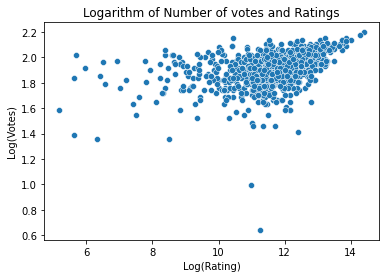

In [235]:
ax= plt.subplot()

movies_Rating = [np.log(rating) for rating in movies['Rating']]
movies_votes = [np.log(votes) for votes in movies['Votes']]

sns.scatterplot(y=movies_Rating,
                x=movies_votes)

ax.set_xlabel('Log(Rating)');
ax.set_ylabel('Log(Votes)'); 
ax.set_title('Logarithm of Number of votes and Ratings')

### Genre & Rating Analysis

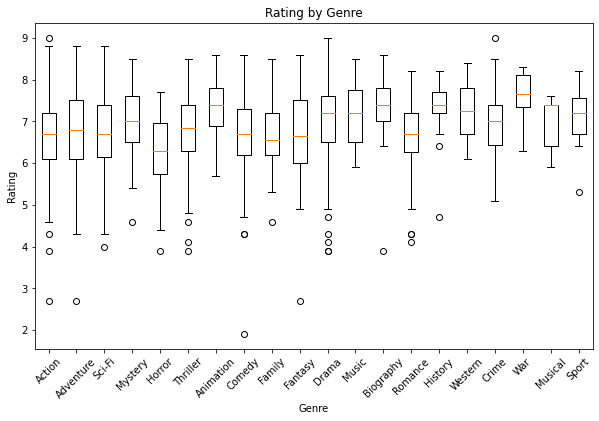

In [240]:
# Split the genres column and stack the data
stacked = movies['Genre'].str.split(',', expand=True).stack()
stacked.index = stacked.index.droplevel(1)
stacked.name = 'genre'
stacked_df = movies[['Rating']].join(stacked)
stacked_df

# Create the boxplot
plt.figure(figsize=(10, 6))
data = [stacked_df[stacked_df['genre'] == genre]['Rating'] for genre in stacked_df['genre'].unique()]
plt.boxplot(data)
plt.xticks(range(1, len(data)+1), stacked_df['genre'].unique(), rotation=45)
plt.ylabel('Rating')
plt.xlabel('Genre')
plt.title('Rating by Genre')
plt.show()

Text(0.5, 1.0, 'Genre Count')

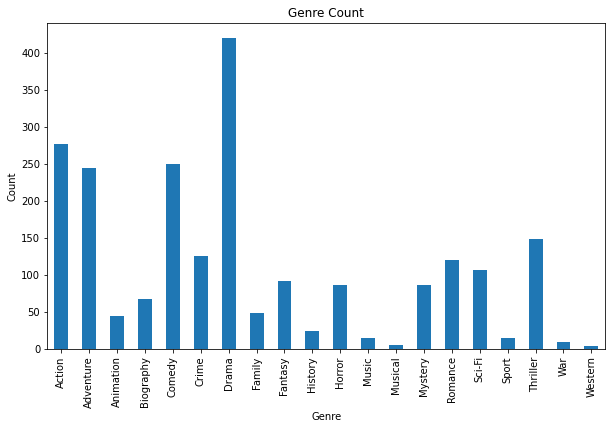

In [242]:
genre_count = stacked_df.groupby(['genre']).count()['Rating']
plt.figure(figsize=(10, 6))
genre_count.plot.bar();
plt.xlabel('Genre');
plt.ylabel('Count'); 
plt.title('Genre Count')

### Runtime Movie Analysis

In [ ]:
feature_movies = movies[movies['Runtime (Minutes)'] > 120]
non_feature_movies = movies[movies['Runtime (Minutes)'] < 120]
is_Feature = ['Non_Feature'] * len(movies)
is_high_Rev = [0] * len(movies)
is_high_Rating = [0] * len(movies)
for i in range(len(movies)):
    if movies['Runtime (Minutes)'][i] >= 120:
        is_Feature[i] = 'Feature'
    if movies['Revenue (Millions)'][i] >= 95.297:
        is_high_Rev[i] = 1
    if movies['Rating'][i] >= 7.3:
        is_high_Rating[i] = 1
movies['is_Feature'] = is_Feature
movies['is_high_Rev'] = is_high_Rev
movies['is_high_Rating'] = is_high_Rating
movies

In [ ]:
high_Rev_rates = movies.groupby('is_Feature')['is_high_Rev']

std_p = lambda x: np.std(x, ddof=0)              
se_p = lambda x: stats.sem(x, ddof=0)            

high_Rev_rates = high_Rev_rates.agg([np.mean, std_p, se_p])
high_Rev_rates.columns = ['High_Rev_Rate', 'rev_std_deviation', 'rev_std_error']

high_Rev_rates.style.format('{:.3f}')

In [ ]:
high_Rating_rates = movies.groupby('is_Feature')['is_high_Rating']

high_Rating_rates = high_Rating_rates.agg([np.mean, std_p, se_p])
high_Rating_rates.columns = ['High_Rating_Rate', 'rev_std_deviation', 'rev_std_error']

high_Rating_rates.style.format('{:.3f}')

In [ ]:
ax= plt.subplot()

ax = sns.barplot(x=movies['is_Feature'], y=movies['is_high_Rev'], ci=False)

ax.set_title('High Revenue Rate by Feature/Non Feature movies', pad=20)
ax.set_xlabel('Feature/Non Feature movies', labelpad=15)
ax.set_ylabel('High Revenue (proportion)', labelpad=15);
for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
ax= plt.subplot()

ax = sns.barplot(x=movies['is_Feature'], y=movies['is_high_Rating'], ci=False)

ax.set_title('High Rating Rate by Feature/Non Feature movies', pad=20)
ax.set_xlabel('Feature/Non Feature movies', labelpad=15)
ax.set_ylabel('High Rating (proportion)', labelpad=15);
for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
control_results = movies[movies['is_Feature'] == 'Non_Feature']['is_high_Rev']
treatment_results = movies[movies['is_Feature'] == 'Feature']['is_high_Rev']
successes = [control_results.sum(), treatment_results.sum()]
nobs = [control_results.count(), treatment_results.count()]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.20f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

In [ ]:
control_results = movies[movies['is_Feature'] == 'Non_Feature']['is_high_Rating']
treatment_results = movies[movies['is_Feature'] == 'Feature']['is_high_Rating']
successes = [control_results.sum(), treatment_results.sum()]
nobs = [control_results.count(), treatment_results.count()]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.20f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')